- 데이터 셋 : iris.csv
- 조건 :
    * 분류 : 3개 품종 중 2개를 선택하여 이진 분류 진행
    * 회귀 : 3개 품종 중 1개 선택, 4개 피쳐 중 꽃잎의 길이값 예측 회귀

In [466]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [467]:
# 데이터 파일 가져오기
file_name = r'C:\VSCode\KDT\머신러닝\DAY01\iris.csv'
iris_df = pd.read_csv(file_name)

### 분류

In [468]:
# 데이터 구조 확인
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [469]:
# 품종 확인
iris_df['variety'].value_counts()

# 데이터 개수가 모두 같으므로 Setosa, Versicolor 선택

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [470]:
Setosa_df = iris_df[iris_df['variety'] == 'Setosa']
Versicolor_df = iris_df[iris_df['variety'] == 'Versicolor']

In [471]:
SV_df = pd.concat([Setosa_df,Versicolor_df])

In [472]:
# variety 컬럼을 수치화 => 'Setosa':0,'Versicolor':1
SV_df['Code']=SV_df['variety'].replace({'Setosa':0,'Versicolor':1})
SV_df

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_18660\2325960729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SV_df['Code']=SV_df['variety'].replace({'Setosa':0,'Versicolor':1})


,sepal.length,sepal.width,petal.length,petal.width,variety,Code
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor,1
96,5.7,2.9,4.2,1.3,Versicolor,1
97,6.2,2.9,4.3,1.3,Versicolor,1
98,5.1,2.5,3.0,1.1,Versicolor,1


In [473]:
# 상관계수 확인하기
SV_df.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,Code
sepal.length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal.width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal.length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal.width,0.789608,-0.570883,0.979322,1.000000,0.960307
Code,0.728290,-0.690684,0.969990,0.960307,1.000000


In [474]:
features = SV_df[['petal.length','petal.width']]
target = SV_df['Code']

print(f'features = > {features.shape},{features.ndim}D')
print(f'target = > {target.shape},{target.ndim}D')

features = > (100, 2),2D
target = > (100,),1D


In [475]:
# variety 인코딩 해주기
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [476]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 target,
                                                 test_size = 0.3,
                                                 stratify = target,
                                                 random_state = 10)

In [477]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (70, 2),2D
y_train : (70,),1D
X_test : (30, 2),2D
y_test : (30,),1D


In [478]:
from sklearn.neighbors import KNeighborsClassifier

In [479]:
# 모델 인스턴스 생성
K_model = KNeighborsClassifier()

In [480]:
# 모델 학습
K_model.fit(X_train,y_train)

KNeighborsClassifier()

In [481]:
K_model.score(X_test,y_test)

1.0

### 회귀
- 꽃잎(petal)의 길이 예측

In [482]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)

In [483]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [484]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [485]:
iris_DF = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [486]:
iris_DF['target'] = iris['target']

In [487]:
mask = (iris_DF['target']==2)
virginica_DF = iris_DF[mask]

In [488]:
virginica_DF=virginica_DF.drop(columns=['target'])

In [489]:
virginica_DF.reset_index(inplace=True, drop=True)

In [490]:
# 이상치 확인
virginica_DF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [491]:
# 결측치 확인
virginica_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
 2   petal length (cm)  50 non-null     float64
 3   petal width (cm)   50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


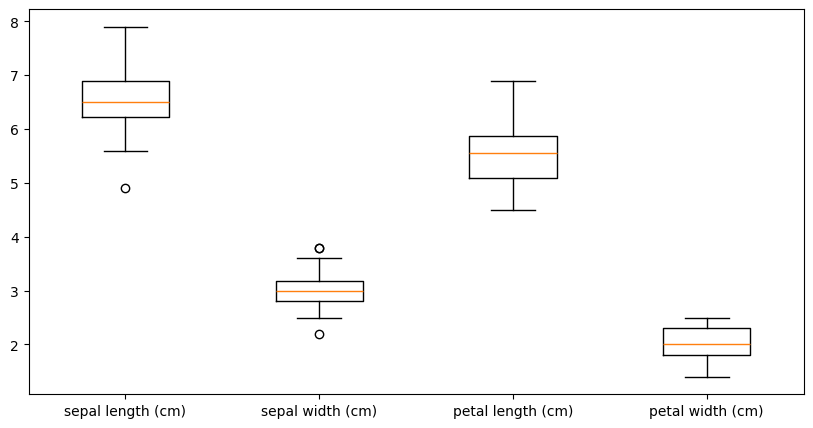

In [492]:
# 박스플롯
plt.figure(figsize=(10,5))
plt.boxplot(virginica_DF.iloc[:,:4])
plt.xticks(np.arange(1, 5), virginica_DF.columns[:4])
plt.show()

In [493]:
# 상관관계 분석
virginica_DF.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


<Axes: >

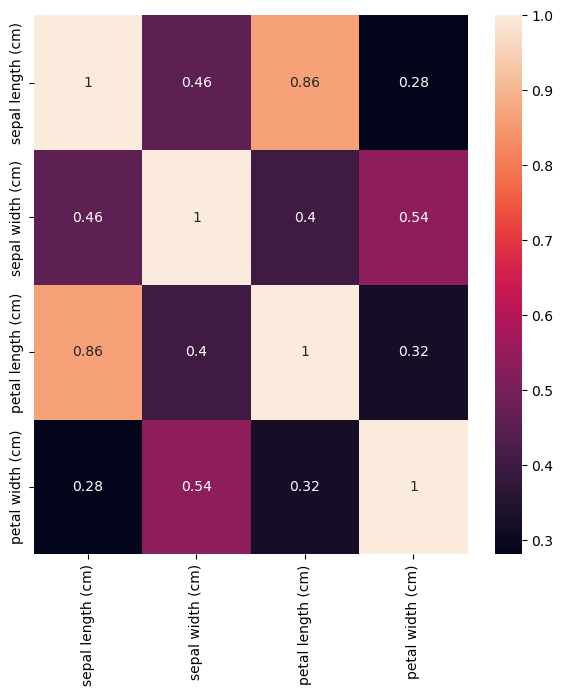

In [494]:
plt.figure(figsize=(7,7))
sns.heatmap(virginica_DF.corr(),annot=True)

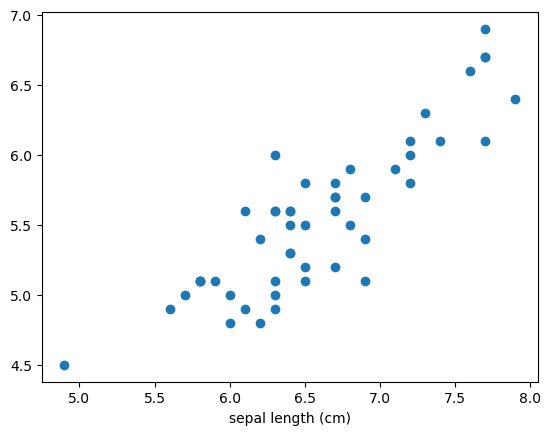

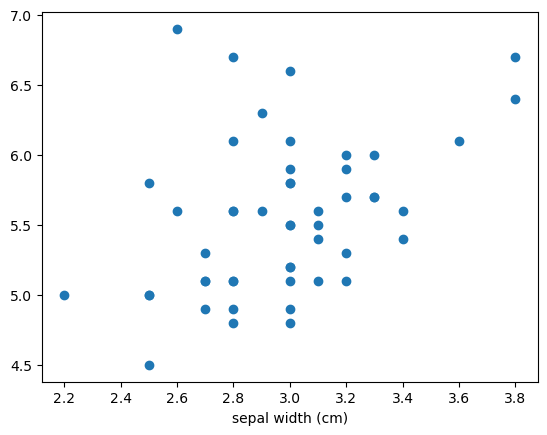

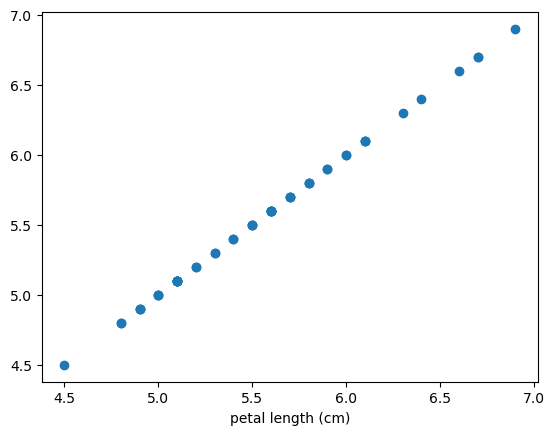

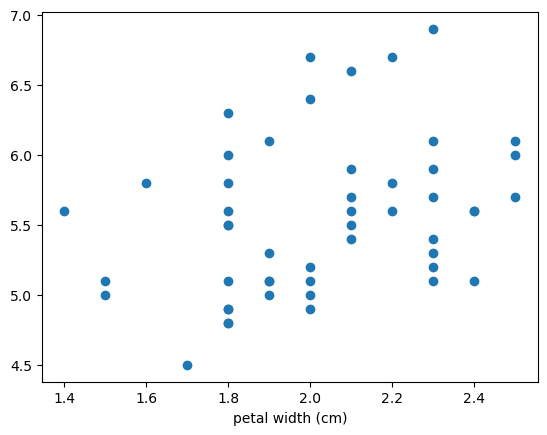

In [495]:
for i in virginica_DF.columns:
    plt.scatter(virginica_DF[i],virginica_DF['petal length (cm)'])
    plt.xlabel(i)
    plt.show()

In [496]:
features = virginica_DF[['sepal length (cm)','sepal width (cm)']]
target = virginica_DF['petal length (cm)']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (50, 2), 2D
target : (50,), 1D


In [497]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=10)

In [498]:
# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler

In [499]:
# 인스턴스 생성
mmScaler = MinMaxScaler()

In [500]:
mmScaler.fit(X_train)

MinMaxScaler()

In [501]:
# 학습용, 테스트용 데이터 셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 변환
X_train_scaled = mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()


((15, 2), -0.3043478260869561, 0.7826086956521738)

In [502]:
# 모델 생성
from sklearn.linear_model import LinearRegression

In [503]:
# 인스턴스 생성
model = LinearRegression()

In [504]:
# 학습 진행
model.fit(X_train_scaled,y_train)

LinearRegression()

In [505]:
from sklearn.metrics import mean_squared_error, r2_score

In [506]:
print(f'테스트 결정계수 : {model.score(X_test_scaled,y_test)}')

테스트 결정계수 : 0.7126507054612989


In [507]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print((f'mse : {mse}'))
print(f'r2 : {r2}')

mse : 0.0583127501717204
r2 : 0.7126507054612989


In [508]:
X_line = np.linspace(X_train_scaled.min(),X_train_scaled.max(),100)
y_line = model.coef_[0]*X_line+model.intercept_

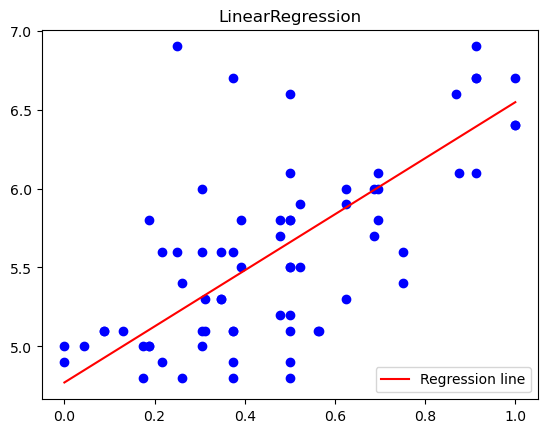

In [509]:
plt.plot(X_train_scaled,y_train,'bo')
plt.plot(X_line,y_line,color='r',label='Regression line')
plt.legend()
plt.title('LinearRegression')
plt.show()

In [510]:
# 예측값 시각화
df_results = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_results

,Actual,Predicted
37,5.5,5.426732
23,4.9,5.332797
44,5.7,5.666709
42,5.1,4.946778
47,5.2,5.499753
20,5.7,5.816934
3,5.6,5.341162
30,6.1,6.186222
7,6.3,6.113201
6,4.5,4.243577


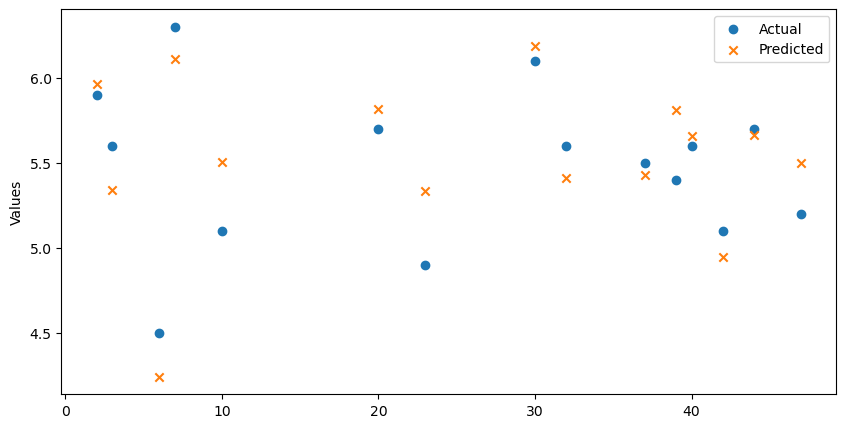

In [511]:
plt.figure(figsize=(10,5))
plt.scatter(df_results.index,df_results['Actual'],label="Actual",marker = 'o')
plt.scatter(df_results.index,df_results['Predicted'],label='Predicted',marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()

In [512]:
# 교차검증
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate

In [513]:
### cross_val_score
score = cross_val_score(model,X_train_scaled,y_train,cv=5)

In [514]:
print(f'cv_score : {score}')

cv_score : [ 0.81407034  0.76877489  0.6263415   0.71244018 -0.58969141]


In [515]:
cv_results = cross_validate(model,X_train_scaled,y_train,cv=5,
                           scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),
                           return_train_score=True)

In [516]:
cv_results

{'fit_time': array([0.00199199, 0.00118685, 0.00121856, 0.00135565, 0.00053358]),
 'score_time': array([0.00099802, 0.00099778, 0.00099683, 0.00104308, 0.        ]),
 'test_r2': array([ 0.81407034,  0.76877489,  0.6263415 ,  0.71244018, -0.58969141]),
 'train_r2': array([0.70780607, 0.73521744, 0.77524075, 0.74254929, 0.79299691]),
 'test_neg_mean_squared_error': array([-0.10009846, -0.12278525, -0.11087744, -0.0417842 , -0.11225168]),
 'train_neg_mean_squared_error': array([-0.08252988, -0.07609459, -0.07769102, -0.09476747, -0.08105861]),
 'test_neg_mean_absolute_error': array([-0.28875503, -0.31497866, -0.26287377, -0.16564707, -0.24757366]),
 'train_neg_mean_absolute_error': array([-0.22571753, -0.2140594 , -0.23360005, -0.25642677, -0.25086429])}

In [517]:
cv_r2 = cv_results['test_r2']
cv_mse = -cv_results['test_neg_mean_squared_error']  
cv_mae = -cv_results['test_neg_mean_absolute_error']  

print(f"Cross-validated R^2: {cv_r2.mean():.3f} (std: {cv_r2.std():.3f})")
print(f"Cross-validated MSE: {cv_mse.mean():.3f} (std: {cv_mse.std():.3f})")
print(f"Cross-validated MAE: {cv_mae.mean():.3f} (std: {cv_mae.std():.3f})")

Cross-validated R^2: 0.466 (std: 0.532)
Cross-validated MSE: 0.098 (std: 0.029)
Cross-validated MAE: 0.256 (std: 0.051)
